In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle

file = 'pklFiles/df.pkl'
with open(file, 'rb') as fileobj:
    df = pickle.load(fileobj)

np.random.seed(42)
shuffled_df = df.sample(frac=1).reset_index(drop=True)
split_ratio = 0.8
split_index = int(len(shuffled_df) * split_ratio)
X_train = shuffled_df['title'][:split_index].fillna('').astype(str)
X_test = shuffled_df['title'][split_index:].fillna('').astype(str)
y_train = shuffled_df['category'][:split_index].fillna('').astype(str)
y_test = shuffled_df['category'][split_index:].fillna('').astype(str)

count_vectorizer = pickle.load(open('pklFiles/count_vectorizer.pkl', 'rb'))
X_train_vec = count_vectorizer.transform(X_train)
X_test_vec = count_vectorizer.transform(X_test)

In [3]:
# Define models
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
}
results = {}
confusion_matrices = {}
precision_recall = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_vec, y_train)
    predictions = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, 
                                                             average='weighted',
                                                             zero_division=0)  # Add this parameter
    conf_matrix = confusion_matrix(y_test, predictions)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    confusion_matrices[name] = conf_matrix


Training SVM...
Training Naive Bayes...
Training Random Forest...
Training Neural Network...


<Figure size 1200x600 with 0 Axes>

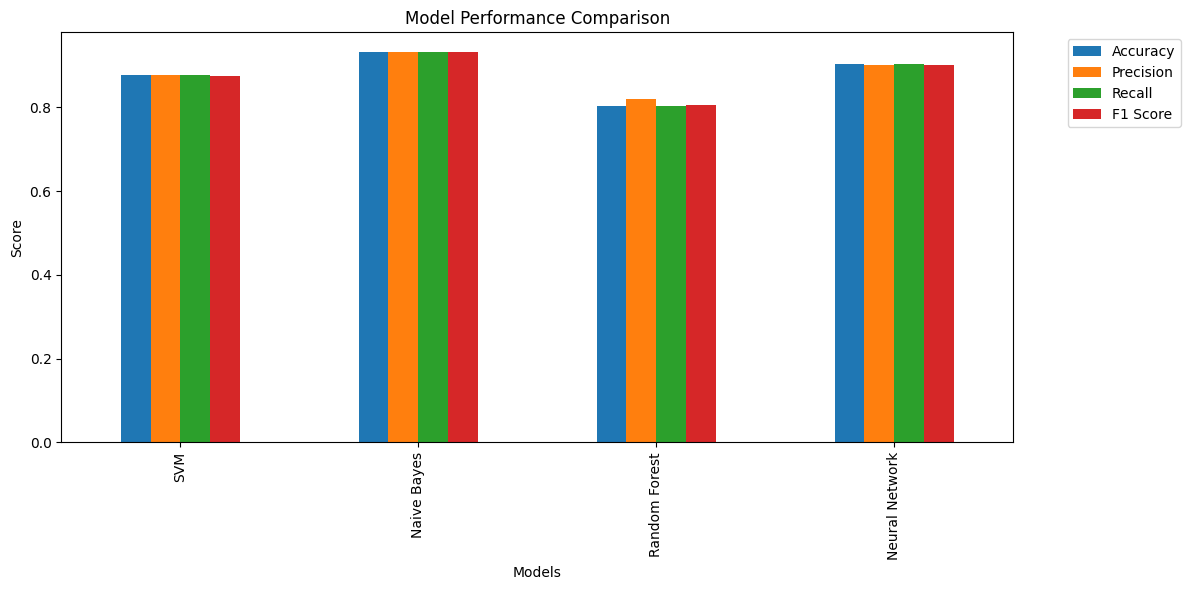

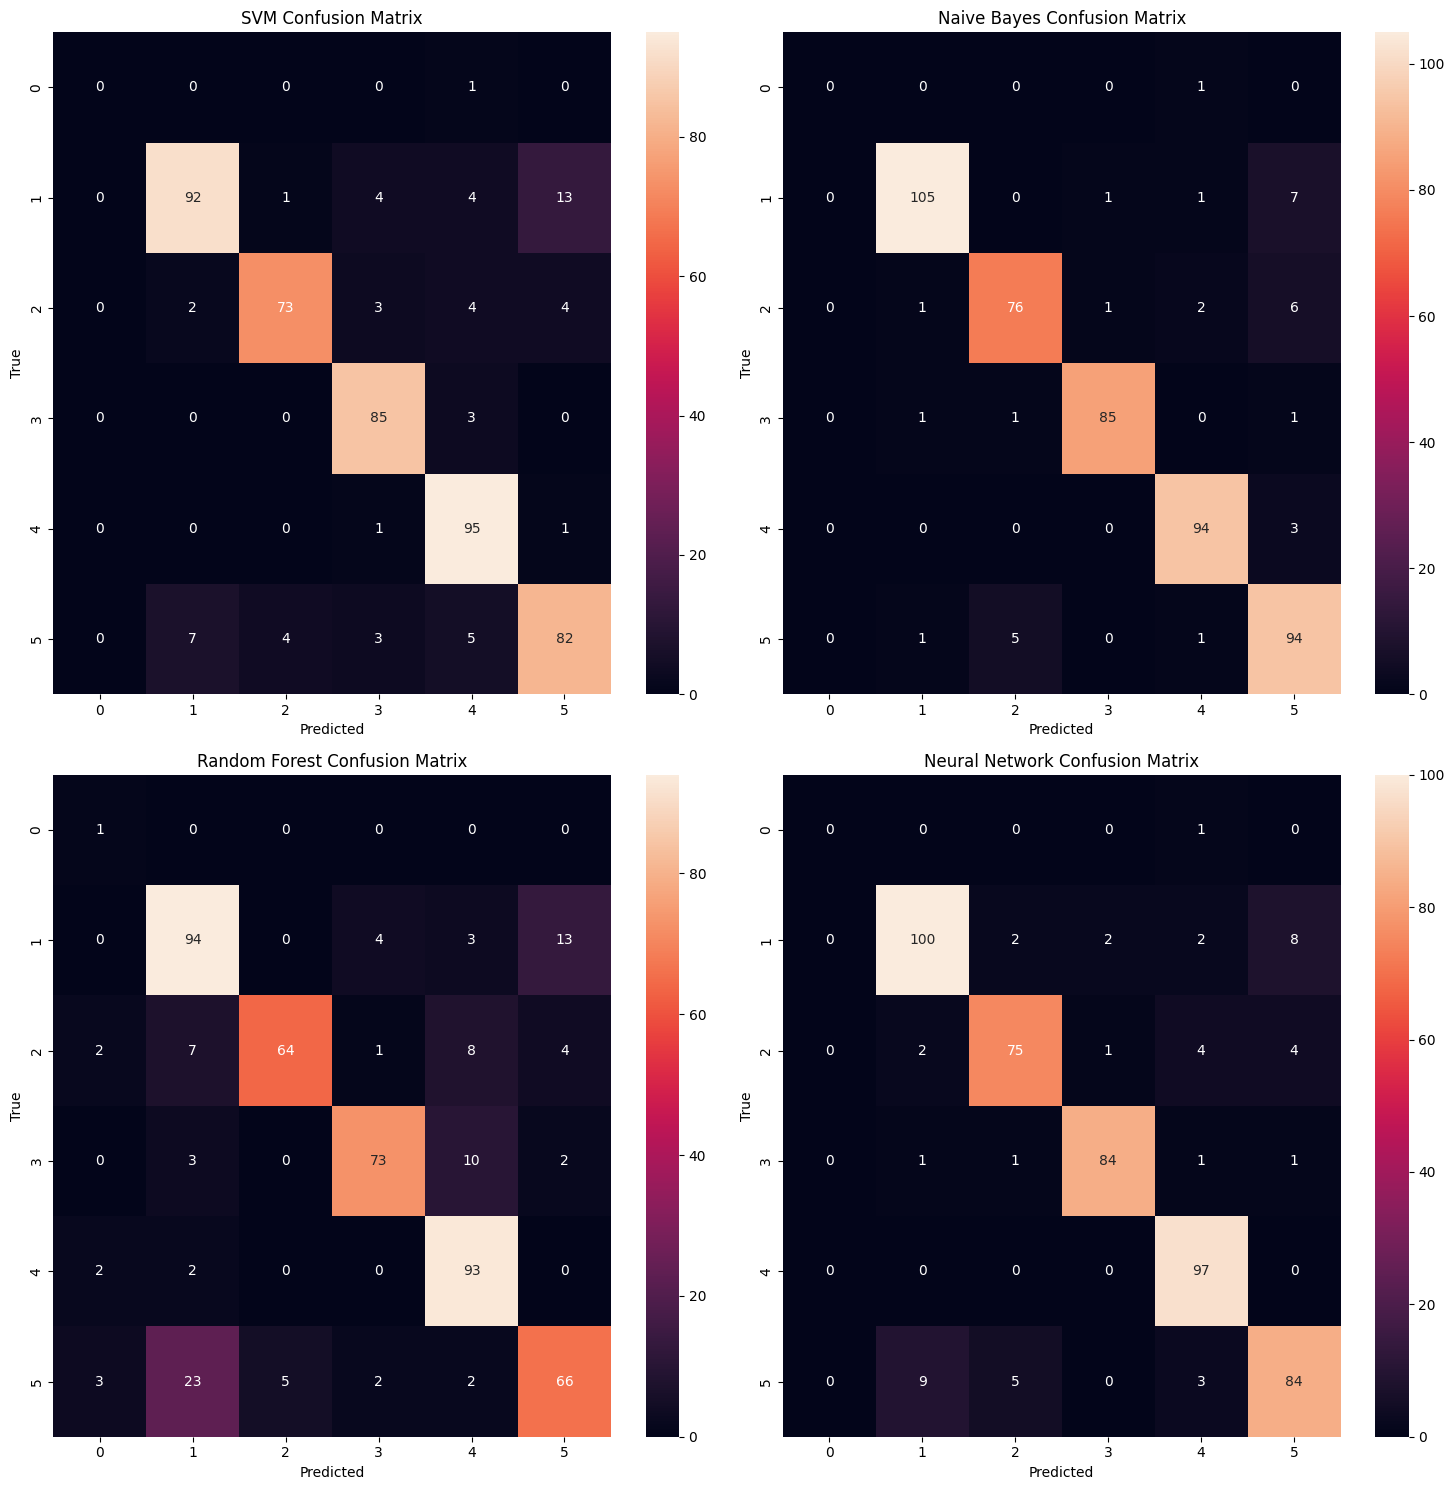

In [5]:
plt.figure(figsize=(12, 6))
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

for idx, (name, conf_matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', ax=axes[idx])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')

plt.tight_layout()
plt.show()